# Imports and setting up viz

NB : conda env1 on Mac, lam1env on spirit (Python3.12)

In [21]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import personnal tools
import sys
sys.path.append('../../python_tools/')
from tools import *
from tools_routing import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',edgecolor=(0, 0, 0, 0.3), facecolor='none')

# Load files

LAM output analysis, routing files.

Simu irr et simu no-irr.

## Sims

In [23]:
sim224_dir='../../../JZ_simu_outputs/LAM/LAM_1500_40_sim224'
sim225_dir='../../../JZ_simu_outputs/LAM/LAM_1500_40_sim225'

In [24]:
filename = '{}/SRF/MO/sim224*_diag_routing_r.nc'.format(sim224_dir)
sim_224 = xr.open_mfdataset(filename)
rename_dict = {
        'time_counter' : 'time',
        'routing_hydrographs_r' : 'hydrographs',
}
sim224 = sim_224.rename(rename_dict)

#add unit m³/s to hydrographs
sim224['hydrographs'].attrs['units'] = 'm³/s'

sim224.attrs['name'] = 'normal'

sim224

<xarray.Dataset>
Dimensions:                     (lat: 630, lon: 840, basins: 200, time: 60,
                                 axis_nbounds: 2)
Coordinates:
  * lat                         (lat) float32 46.49 46.47 46.46 ... 36.03 36.01
  * lon                         (lon) float32 -9.992 -9.975 ... 3.975 3.992
  * basins                      (basins) |S255 b'Amazon\x00                  ...
    time_instant                (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                        (time) datetime64[ns] 2010-02-01 ... 2015-01-01
Dimensions without coordinates: axis_nbounds
Data variables: (12/13)
    time_instant_bounds         (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds         (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    flow_r                      (time, lat, lon) float64 dask.array<chunksize=(1, 630, 840), meta=np.ndarray>
    routing_runoff_r            (time, lat, lon) float64 dask.array<chunksize=(1, 630, 840), meta=np.ndarray>
    routing_drainage_r          (time, lat, lon) float64 dask.array<chunksize=(1, 630, 840), meta=np.ndarray>
    routing_fast_reservoir_r    (time, lat, lon) float64 dask.array<chunksize=(1, 630, 840), meta=np.ndarray>
    ...                          ...
    routing_stream_reservoir_r  (time, lat, lon) float64 dask.array<chunksize=(1, 630, 840), meta=np.ndarray>
    hydrographs                 (time, lat, lon) float64 dask.array<chunksize=(1, 630, 840), meta=np.ndarray>
    irrig_netereq_r             (time, lat, lon) float64 dask.array<chunksize=(1, 630, 840), meta=np.ndarray>
    routing_irrigation_r        (time, lat, lon) float64 dask.array<chunksize=(1, 630, 840), meta=np.ndarray>
    basins_riverflow            (time, basins) float64 dask.array<chunksize=(1, 200), meta=np.ndarray>
    routing_basins_area         (time, lat, lon) float64 dask.array<chunksize=(1, 630, 840), meta=np.ndarray>
Attributes:
    name:         normal
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Sep-30 08:04:06 GMT
    uuid:         2abffc6d-59b4-40da-834c-02f645c0fb15

In [25]:
filename = '{}/SRF/MO/sim225*_diag_routing_r.nc'.format(sim225_dir)
sim225 = xr.open_mfdataset(filename)

rename_dict = {
        'time_counter' : 'time',
        'routing_hydrographs_r' : 'hydrographs',
}
sim225 = sim225.rename(rename_dict)

#add unit m³/s to hydrographs
sim225['hydrographs'].attrs['units'] = 'm³/s'

sim225.attrs['name']='accelerated'

sim225

<xarray.Dataset>
Dimensions:                     (lat: 630, lon: 840, basins: 200, time: 60,
                                 axis_nbounds: 2)
Coordinates:
  * lat                         (lat) float32 46.49 46.47 46.46 ... 36.03 36.01
  * lon                         (lon) float32 -9.992 -9.975 ... 3.975 3.992
  * basins                      (basins) |S255 b'Amazon\x00                  ...
    time_instant                (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                        (time) datetime64[ns] 2010-02-01 ... 2015-01-01
Dimensions without coordinates: axis_nbounds
Data variables: (12/13)
    time_instant_bounds         (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds         (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    flow_r                      (time, lat, lon) float64 dask.array<chunksize=(1, 630, 840), meta=np.ndarray>
    routing_runoff_r            (time, lat, lon) float64 dask.array<chunksize=(1, 630, 840), meta=np.ndarray>
    routing_drainage_r          (time, lat, lon) float64 dask.array<chunksize=(1, 630, 840), meta=np.ndarray>
    routing_fast_reservoir_r    (time, lat, lon) float64 dask.array<chunksize=(1, 630, 840), meta=np.ndarray>
    ...                          ...
    routing_stream_reservoir_r  (time, lat, lon) float64 dask.array<chunksize=(1, 630, 840), meta=np.ndarray>
    hydrographs                 (time, lat, lon) float64 dask.array<chunksize=(1, 630, 840), meta=np.ndarray>
    irrig_netereq_r             (time, lat, lon) float64 dask.array<chunksize=(1, 630, 840), meta=np.ndarray>
    routing_irrigation_r        (time, lat, lon) float64 dask.array<chunksize=(1, 630, 840), meta=np.ndarray>
    basins_riverflow            (time, basins) float64 dask.array<chunksize=(1, 200), meta=np.ndarray>
    routing_basins_area         (time, lat, lon) float64 dask.array<chunksize=(1, 630, 840), meta=np.ndarray>
Attributes:
    name:         accelerated
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Sep-30 08:09:38 GMT
    uuid:         7b0a61e8-4c55-49ec-9319-e7abd535040d

## Obs

In [7]:
filename = '../../../obs/streamflow/GRDC-Monthly_Spain.nc'
obs = xr.open_dataset(filename)
obs

<xarray.Dataset>
Dimensions:              (time: 1347, id: 186)
Coordinates:
  * time                 (time) datetime64[ns] 1912-01-01 ... 2024-03-01
  * id                   (id) int32 6226100 6226200 6226210 ... 6228910 6228920
Data variables:
    runoff_mean          (time, id) float32 ...
    flag                 (time, id) float32 ...
    area                 (id) float32 ...
    country              (id) object ...
    geo_x                (id) float32 ...
    geo_y                (id) float32 ...
    geo_z                (id) float32 ...
    owneroforiginaldata  (id) object ...
    river_name           (id) object ...
    station_name         (id) object ...
    timezone             (id) float32 ...
Attributes:
    title:          Mean daily discharge (Q)
    Conventions:    CF-1.7
    references:     grdc.bafg.de
    institution:    GRDC
    history:        Download from GRDC Database, 26/06/2024
    missing_value:  -999.000

In [8]:
#create a subdataset from obs with stations that are in dict stations_dict_filtered
obs_filtered = obs.sel(id=(list(stations_dict_filtered.keys())))
obs_filtered

<xarray.Dataset>
Dimensions:              (time: 1347, id: 16)
Coordinates:
  * time                 (time) datetime64[ns] 1912-01-01 ... 2024-03-01
  * id                   (id) int32 6212700 6217700 6217600 ... 6226400 6213800
Data variables:
    runoff_mean          (time, id) float32 ...
    flag                 (time, id) float32 ...
    area                 (id) float32 ...
    country              (id) object ...
    geo_x                (id) float32 ...
    geo_y                (id) float32 ...
    geo_z                (id) float32 ...
    owneroforiginaldata  (id) object ...
    river_name           (id) object ...
    station_name         (id) object ...
    timezone             (id) float32 ...
Attributes:
    title:          Mean daily discharge (Q)
    Conventions:    CF-1.7
    references:     grdc.bafg.de
    institution:    GRDC
    history:        Download from GRDC Database, 26/06/2024
    missing_value:  -999.000

# River outlets and stations

format :     id: {'name':,  'river':, 'lon_grid':, 'lat_grid':, 'year_min':, 'year_max': },


In [9]:
river_coords_merit = {
        1:{'name':'Ebro','river':'Ebro', 'lon_grid': 0.86, 'lat_grid': 40.725, 'year_min':2010, 'year_max':2022 },
        2:{'name':'Minho','river':'Minho', 'lon_grid': -8.875, 'lat_grid': 41.86, 'year_min':2010, 'year_max':2022 },
        3:{'name':'Tajo','river':'Tajo', 'lon_grid': -9.175, 'lat_grid': 38.6875, 'year_min':2010, 'year_max':2022 },
        4:{'name':'Duero','river':'Duero', 'lon_grid': -8.675, 'lat_grid': 41.1375, 'year_min':2010, 'year_max':2022 },
        5:{'name':'Guadiana','river':'Guadiana', 'lon_grid': -7.39, 'lat_grid': 37.175, 'year_min':2010, 'year_max':2022 },
        6:{'name':'Guadalquivir','river':'Guadalquivir', 'lon_grid': -6.325, 'lat_grid': 36.91, 'year_min':2010, 'year_max':2022 }
}

In [10]:
stations_merit = {
    6298992: {'name': 'Albarreal De Tajo',  'river': 'Tajo', 'lon_grid':-4.17499303817749, 'lat_grid':39.891666412353516, 'year_min':2010, 'year_max':2021 },
    # 6298249: {'name': 'Zaragoza',  'river': 'Ebro', 'lon_grid':-0.8749926686286926, 'lat_grid':41.65833282470703, 'year_min':2010, 'year_max':2021},
    # 6298481: {'name': 'San Miguel del Pino', 'river': 'Duero', 'lon_grid':-4.92499303817749, 'lat_grid':41.508331298828125, 'year_min':2010, 'year_max':2021},
    6298259:{'name': 'Badajoz', 'river': 'Guadiana', 'lat_grid': 38.85833358764648, 'lon_grid': -7.008326530456543, 'last_record': '2013-09-15', 'year_min':2010, 'year_max':2021},
    6298564: {'name': 'Villanueva de Azoague', 'lon_grid':-5.641659736633301, 'lat_grid':41.974998474121094, 'year_min':2010, 'year_max':2010}
}

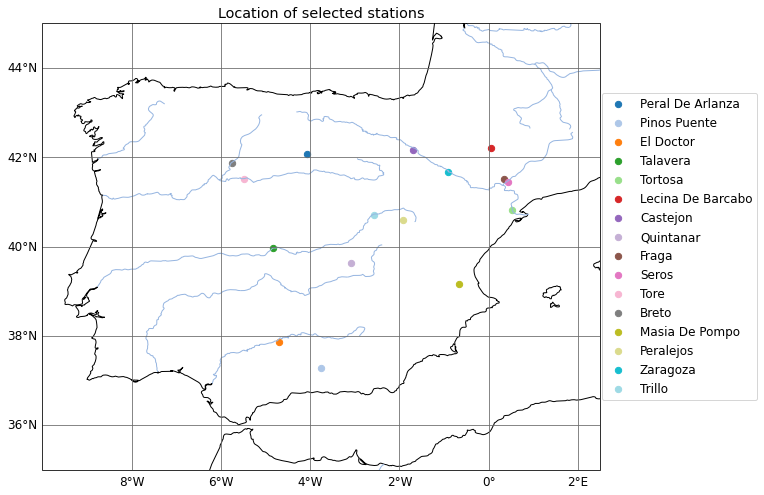

In [11]:
# plot station location on a map with rivers and coastlines
import cartopy
# Define 16 different colors using a colormap
cmap = plt.get_cmap('tab20')  # Or any other colormap you prefer
colors = [cmap(i) for i in np.linspace(0, 1, 16)]

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([-10, 2.5, 35, 45])
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.ylocator = gl.ylocator = plt.MaxNLocator(5)
gl.right_labels = False
gl.top_labels = False
idx=0
for key, coordinates in stations_dict_filtered.items():
    plt.scatter(coordinates['lon_grid'], coordinates['lat_grid'], s=40, label=coordinates['name'], marker='o', color=colors[idx])
    idx+=1
plt.title('Location of selected stations')

#activate legend 
# plt.legend(loc='lower right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.1)


# Maps

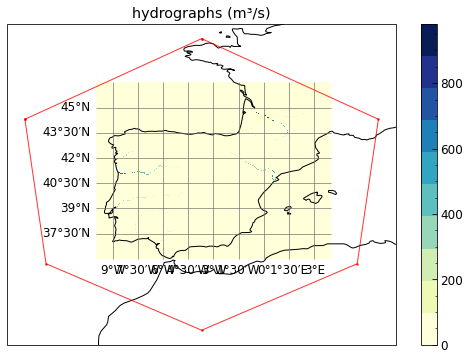

In [12]:
ds=sim225
var='hydrographs'
map_ave(ds, var, cmap=wet, hex=True)

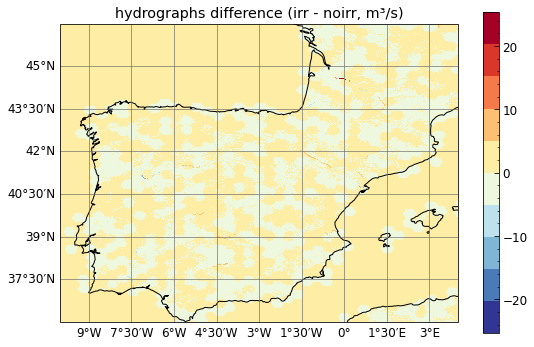

In [13]:
#diff
ds1=sim225
ds2=sim224
var='hydrographs'
map_diff_ave(ds1, ds2, var)

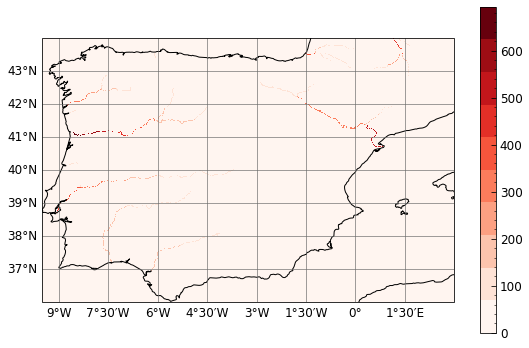

In [14]:
#Display map of var for ds on restricted area
var='hydrographs'
ds = sim225

subdomain = {
    'latmin': 36.75,
    'latmax': 37,
    'lonmin': -6.5,
    'lonmax': -6.25
}
subdomain = subdomain_spain

#restrict ds to latmin, latmax, lonmin, lonmax
ds=restrict_ds(ds, subdomain)
plotvar = ds[var].mean(dim='time')
map_plotvar(plotvar, cmap=reds)

# Time series

## Stations

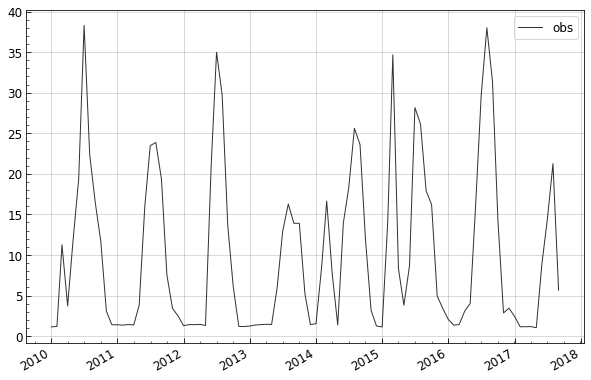

In [15]:
fig=plt.figure(figsize=(10, 6))
ax = plt.axes()
# station_id, station_data=next(iter(stations_merit.items()))
station_id=6226100

ts_station(obs, ax, station_id)

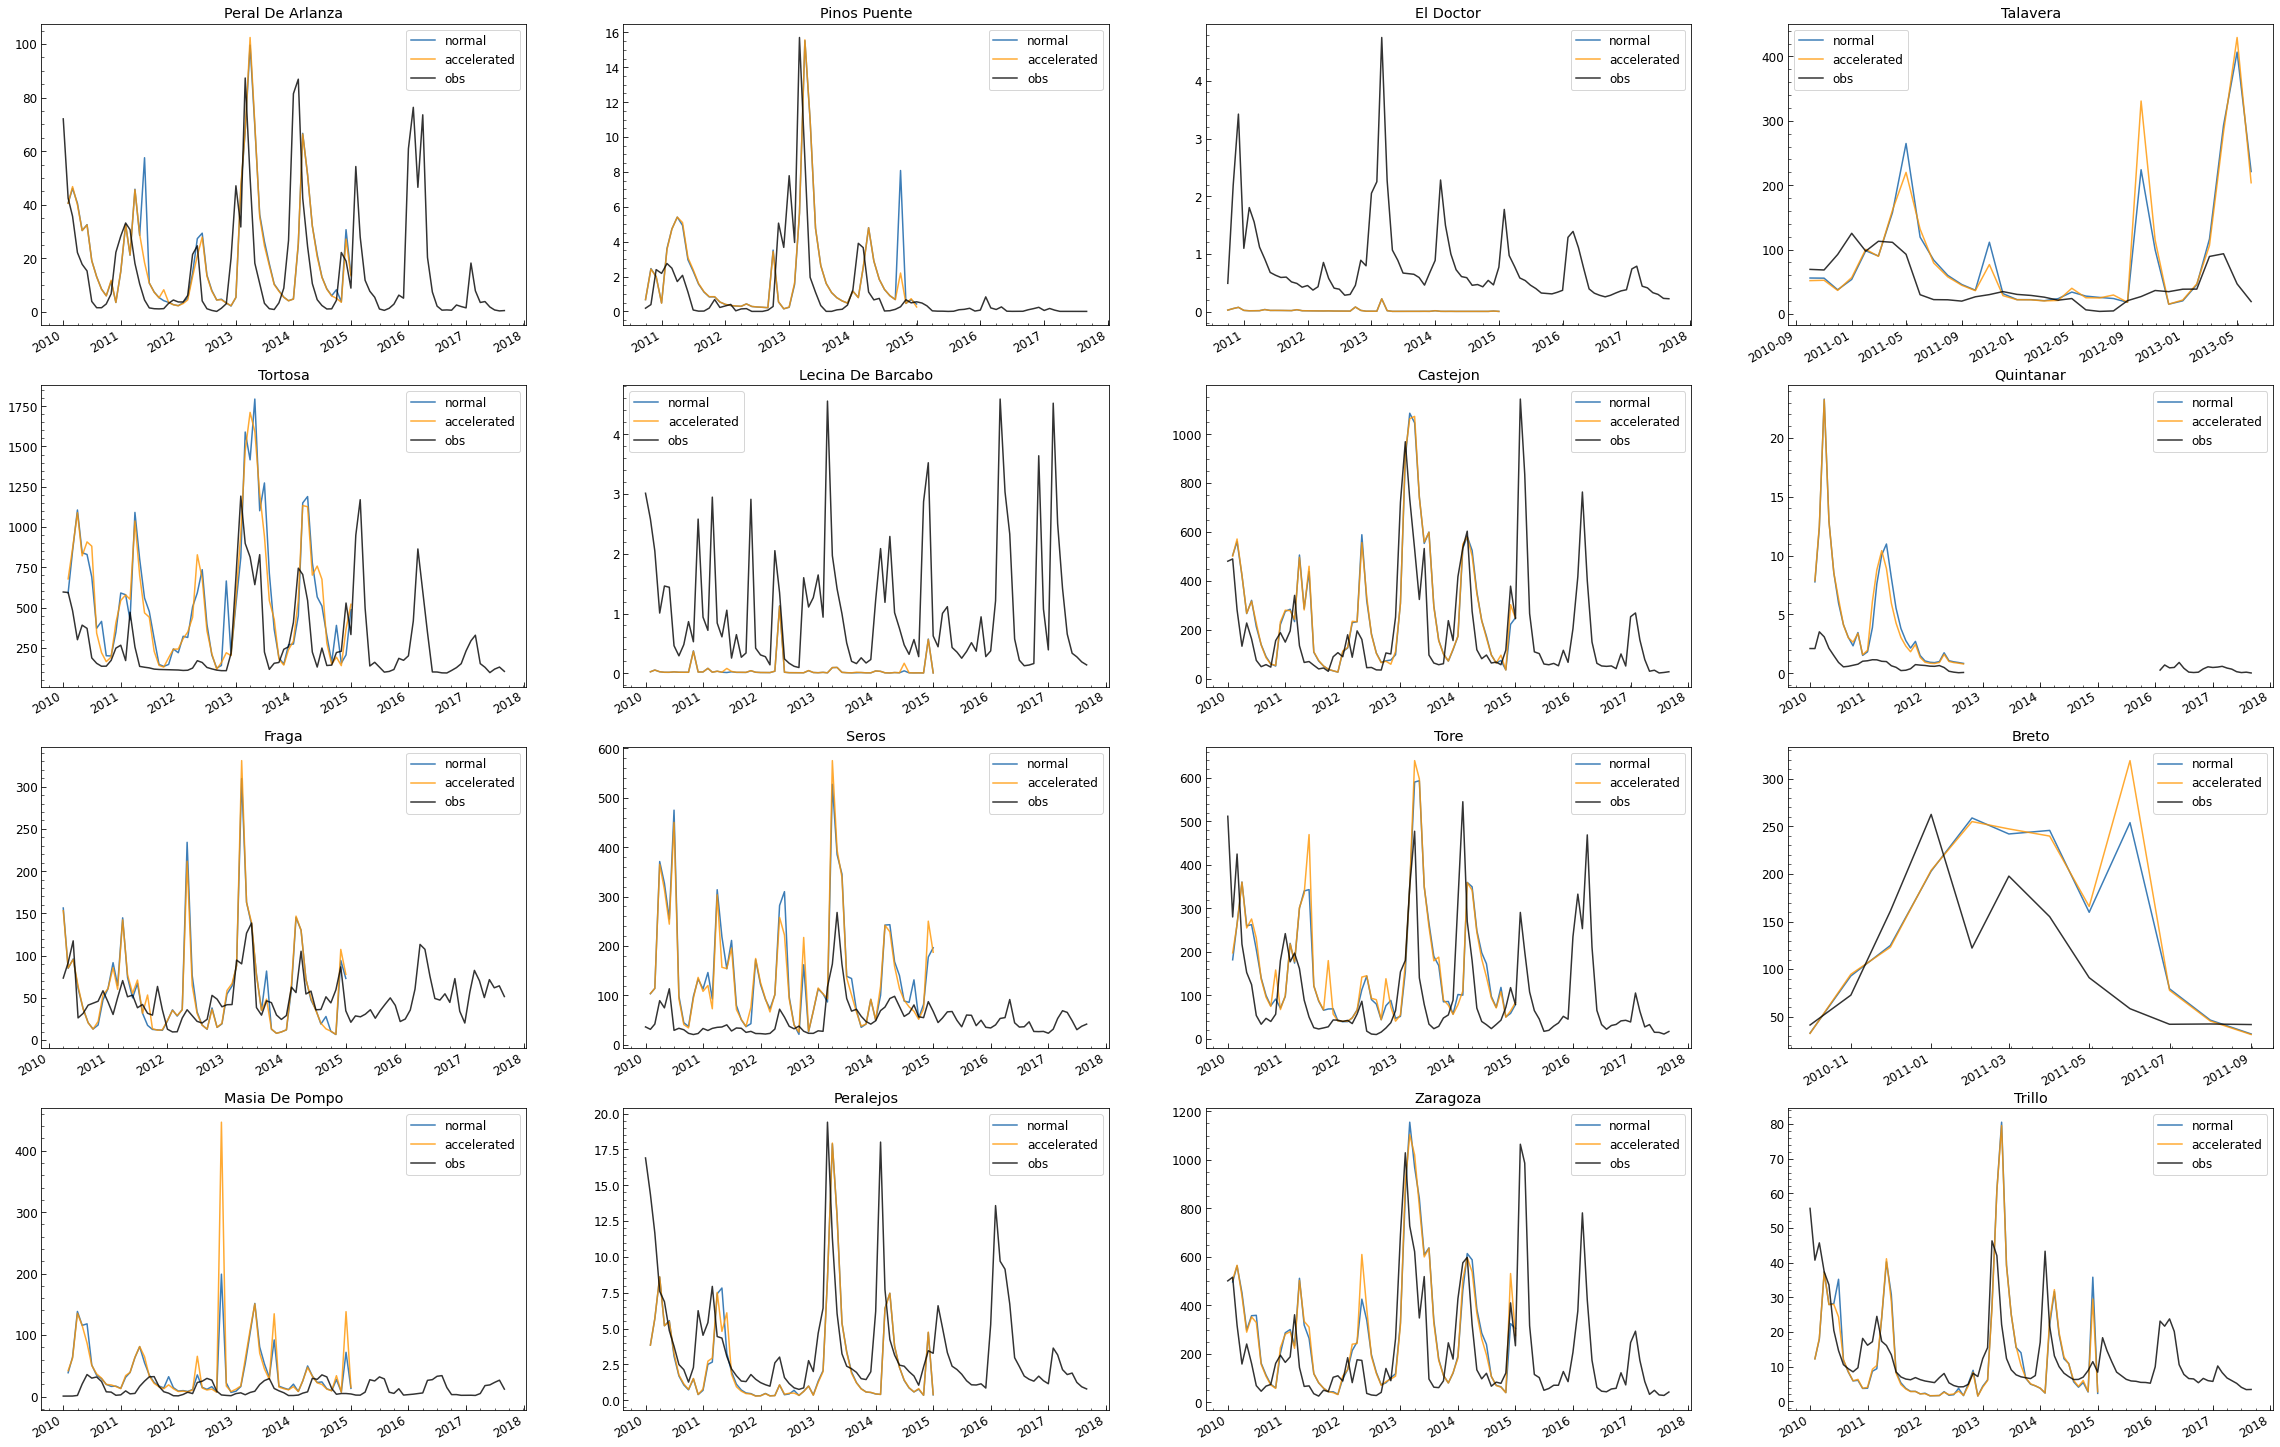

In [27]:
#plot a time series for each station from station_dict_filtered
fig, axes= plt.subplots(4,4, figsize=(40,25))
axes= axes.flatten()
ds_list=[sim224, sim225]
for i, (station_id, station_data) in enumerate(stations_dict_filtered.items()):
    ts_with_obs(ds_list, obs, axes[i], station_id, station_data, year_min=2010, year_max=2022)
    ts_station(obs,axes[i], station_id, name=station_data['name'], year_min=2010, year_max=2022)

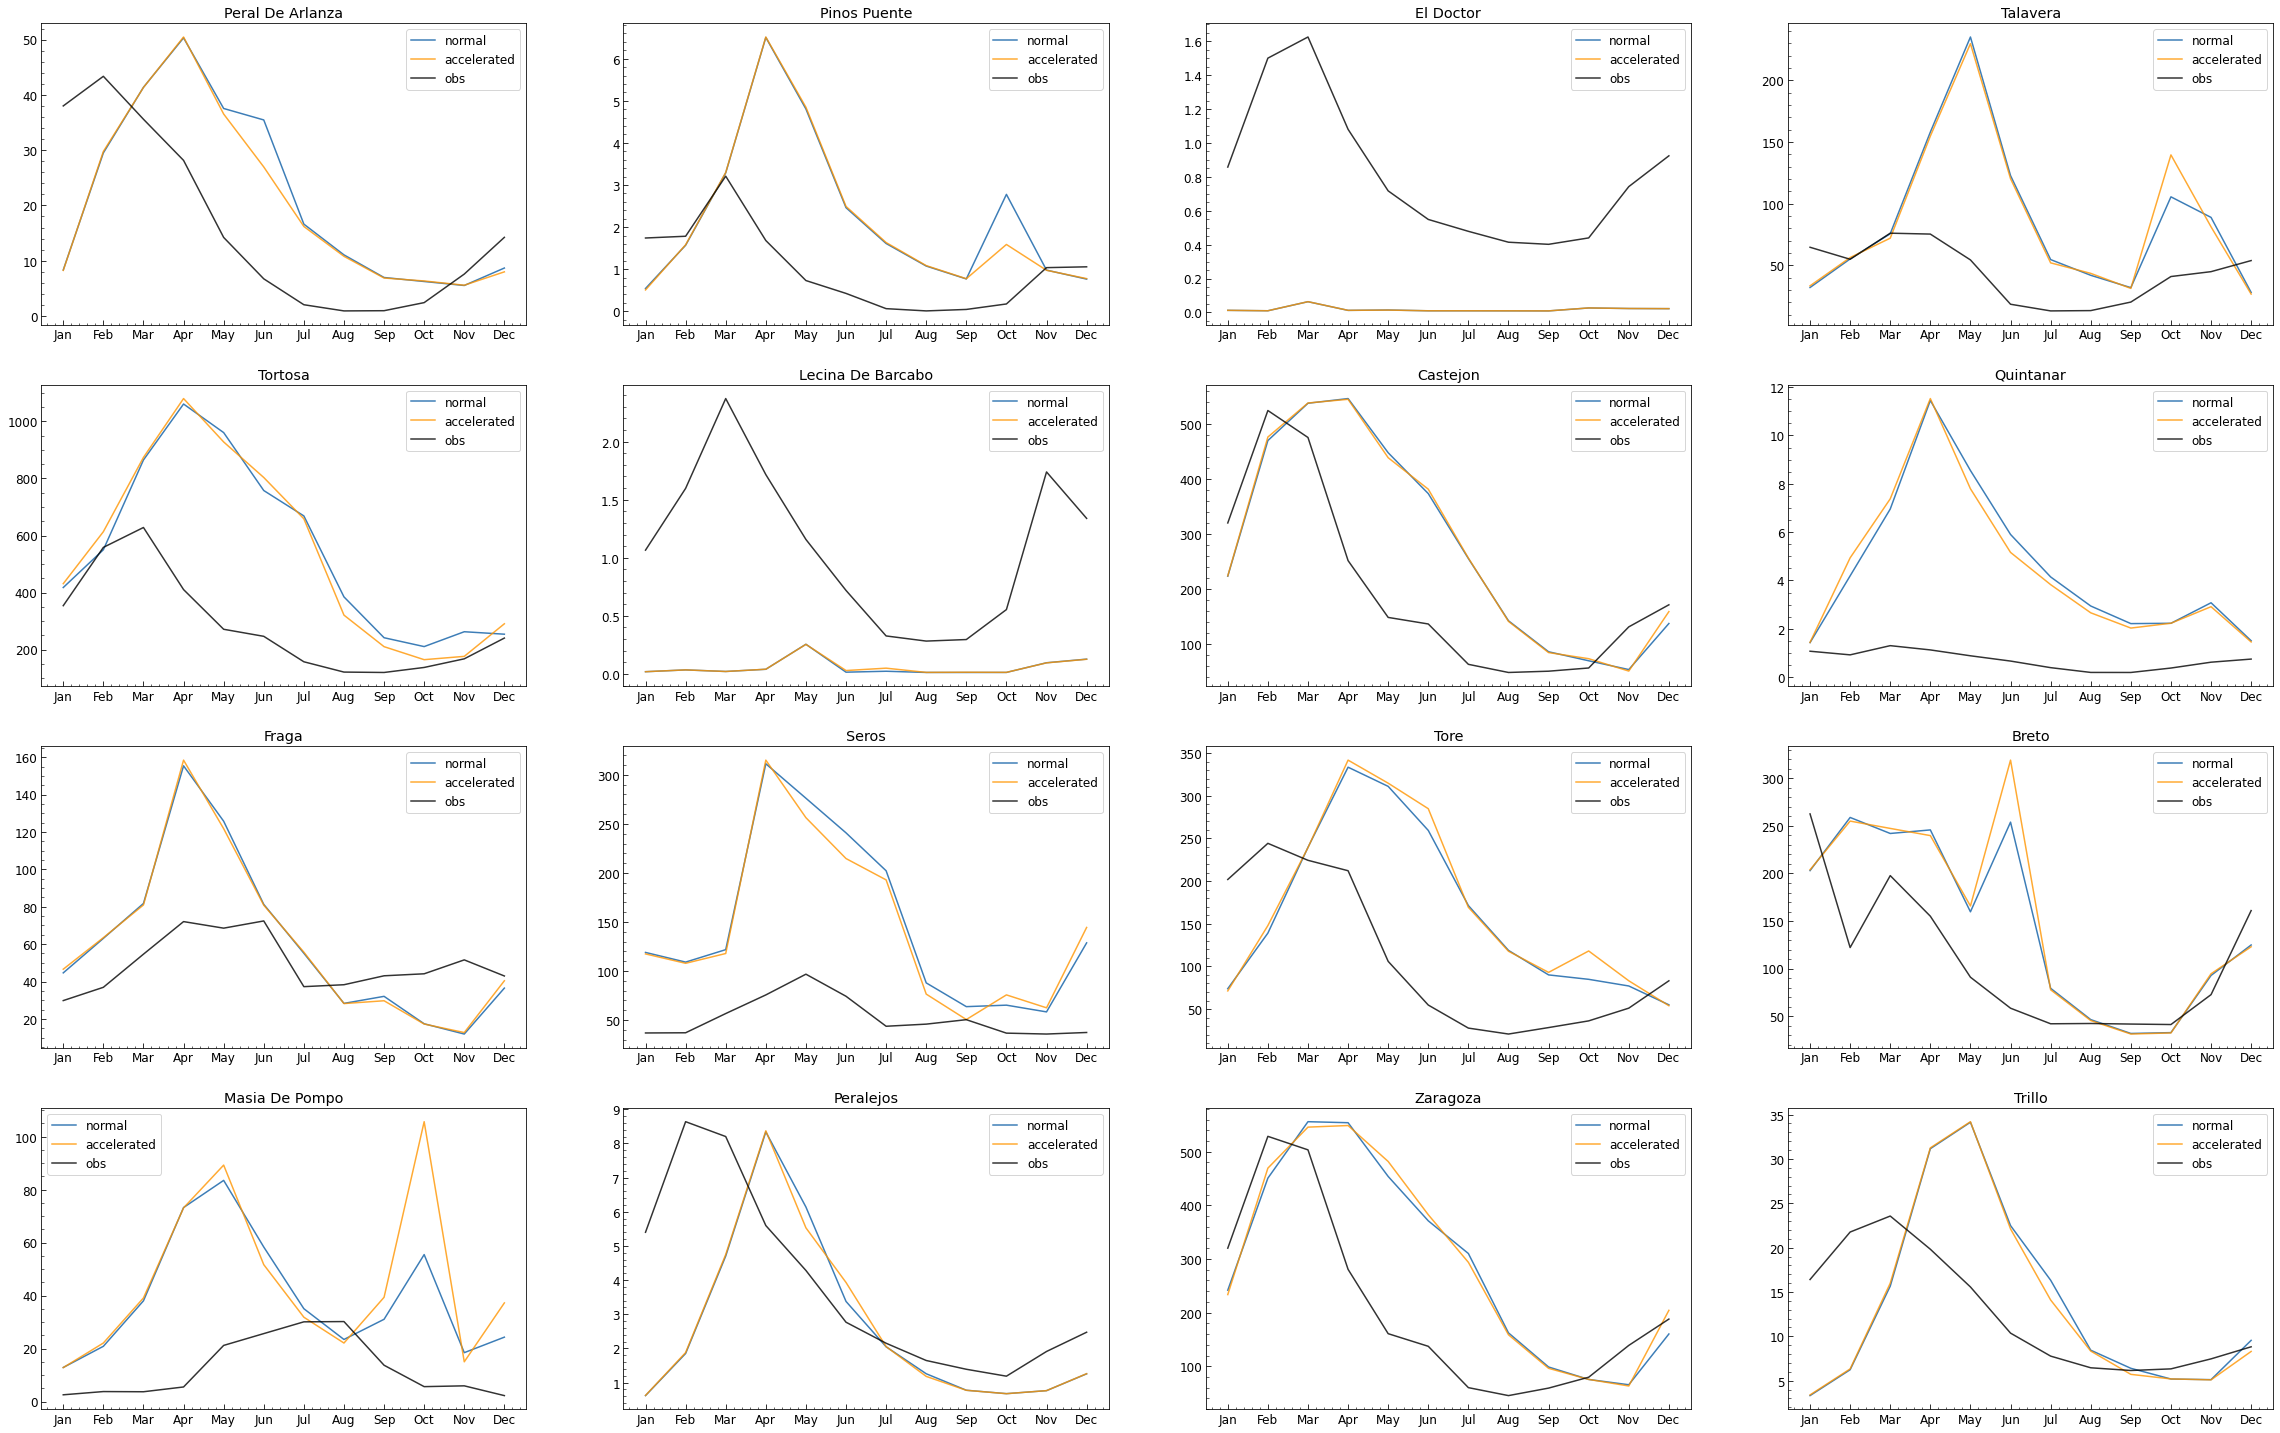

In [26]:
#plot a seasonnal cycle for each station from station_dict_filtered
fig, axes= plt.subplots(4,4, figsize=(40,25))
axes= axes.flatten()
ds_list=[sim224, sim225]
for i, (station_id, station_data) in enumerate(stations_dict_filtered.items()):
    sc_with_obs(ds_list, obs, axes[i], station_id, station_data, year_min=2010, year_max=2022)
    sc_station(obs,axes[i], station_id, name=station_data['name'], year_min=2010, year_max=2022)

## Spatial averaging

irr : 2.02 (m³/s)


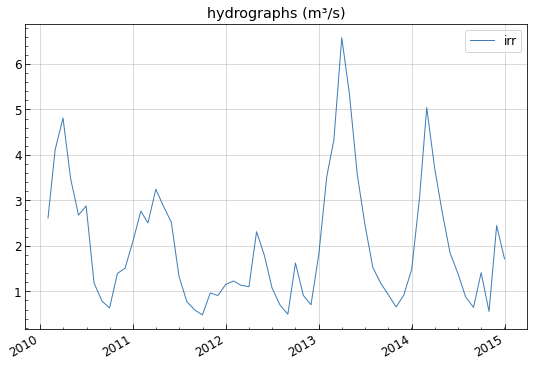

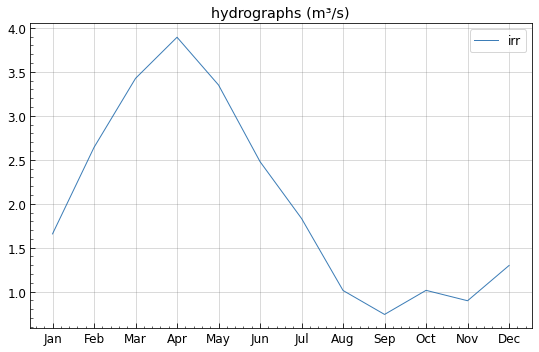

In [18]:
var='hydrographs'

ds1=sim225
# ds2=ORCirr
ds_list=[ds1, ds2]
ds_list=[ds1]

year_max=2015
time_series_ave(ds_list, var, year_max=year_max, title=None)
seasonal_cycle_ave(ds_list, var, title=None)

## En un point lon-lat (ou plusieurs avec dict)

In [19]:
#Time series
var="hydrographs"
ds1=sim
ds_list=[ds1]
year_min=2010
year_max=2015
lon=-6.325
lat=36.91

time_series_lonlat(ds_list, var, lon, lat, year_min=year_min, year_max=year_max, title=None)

NameError: name 'sim' is not defined

In [ ]:
ds_list=[sim]
discharge_coord_ts(ds_list, river_coords_merit, var='hydrographs', year_min=2010, year_max=2015)

In [ ]:
ds_list=[sim]
discharge_coord_sc(ds_list, river_coords_merit, var='hydrographs', year_min=2010, year_max=2015)

# Metrics

## Compute and display in table

In [30]:
station_id, station = next(iter(stations_dict_filtered.items()))
metric_list=[metric_sim_module, metric_obs_module, metric_bias, metric_rmse, metric_tcorr, metric_nse, metric_kge]
for metric_to_use in metric_list:
    metric_value=compute_metric_station(sim224, obs, station_id, station, metric_to_use)
    print('{} for station {} : {}'.format(metric_to_use.__short_name__, station['name'], metric_value))

Module (sim, m³/s) for station Peral De Arlanza : 28.36
Module (obs, m³/s) for station Peral De Arlanza : 15.84000015258789
Bias (m³/s) for station Peral De Arlanza : 12.52
RMSE for station Peral De Arlanza : 27.53
r for station Peral De Arlanza : 0.54
NSE for station Peral De Arlanza : -0.71
KGE for station Peral De Arlanza : 0.02


In [31]:
# output a pandas dataframe with all metric values for a given list of metrics and stations
sim=sim224
metric_list=[metric_sim_module, metric_obs_module, metric_bias, metric_rmse, metric_tcorr, metric_nse, metric_kge]
stations_dict=stations_dict_filtered
# define dataframe with one row per station and one column per metric
df=[]
for station_id, station in stations_dict.items():
    df.append({'Station':station['name']})
    for metric in metric_list:
        name=metric.__short_name__
        metric_value=compute_metric_station(sim, obs, station_id, station, metric)
        metric_value=np.round(metric_value, 2)
        # append metric_value to df
        df[-1][name]=metric_value

# convert df to pandas dataframe
df_noirr=pd.DataFrame(df)
# set Station as index
df_noirr.set_index('Station', inplace=True)
df_noirr['Bias (%)'] = np.round(df_noirr['Bias (m³/s)'] / df_noirr['Module (obs, m³/s)'], 3) * 100
#move Bias (%) to the 4th column
cols = df_noirr.columns.tolist()
cols = cols[:3] + cols[-1:] + cols[3:-1]
df_noirr = df_noirr[cols]
df_noirr

,"Module (sim, m³/s)","Module (obs, m³/s)",Bias (m³/s),Bias (%),RMSE,r,NSE,KGE
Station,,,,,,,,
Peral De Arlanza,28.36,15.840000,12.52,79.0,27.53,0.54,-0.71,0.02
Pinos Puente,1.40,1.000000,0.40,40.0,2.35,0.30,-0.09,0.13
El Doctor,0.03,0.810000,-0.78,-96.3,1.06,0.09,-1.16,-0.63
Talavera,169.56,46.770000,122.79,262.5,204.32,0.35,-34.20,-3.83
Tortosa,523.29,284.250000,239.04,84.1,412.76,0.50,-1.69,-0.11
Lecina De Barcabo,0.35,1.070000,-0.72,-67.3,1.52,-0.01,-1.03,-0.24
Castejon,265.65,198.300003,67.35,34.0,225.22,0.60,-0.02,0.46
Quintanar,4.33,0.690000,3.65,529.0,5.54,0.86,-63.08,-6.90
Fraga,55.98,49.689999,6.29,12.7,39.18,0.53,-1.29,0.10


In [32]:
# output a pandas dataframe with all metric values for a given list of metrics and stations
sim=sim225
metric_list=[metric_sim_module, metric_obs_module, metric_bias, metric_rmse, metric_tcorr, metric_nse, metric_kge]
stations_dict=stations_dict_filtered
# define dataframe with one row per station and one column per metric
df=[]
for station_id, station in stations_dict.items():
    df.append({'Station':station['name']})
    for metric in metric_list:
        name=metric.__short_name__
        metric_value=compute_metric_station(sim, obs, station_id, station, metric)
        metric_value=np.round(metric_value, 2)
        # append metric_value to df
        df[-1][name]=metric_value

# convert df to pandas dataframe
df_irr=pd.DataFrame(df)
# set Station as index
df_irr.set_index('Station', inplace=True)
df_irr['Bias (%)'] = np.round(df_irr['Bias (m³/s)'] / df_irr['Module (obs, m³/s)'], 3) * 100
#move Bias (%) to the 4th column
cols = df_irr.columns.tolist()
cols = cols[:3] + cols[-1:] + cols[3:-1]
df_irr = df_irr[cols]
df_irr

,"Module (sim, m³/s)","Module (obs, m³/s)",Bias (m³/s),Bias (%),RMSE,r,NSE,KGE
Station,,,,,,,,
Peral De Arlanza,27.42,16.440001,10.97,66.7,27.71,0.54,-0.62,0.12
Pinos Puente,0.99,1.000000,-0.00,-0.0,2.20,0.38,0.05,0.31
El Doctor,0.04,0.810000,-0.78,-96.3,1.06,0.03,-1.16,-0.61
Talavera,149.92,46.770000,103.15,220.5,198.23,0.42,-32.14,-3.83
Tortosa,445.91,287.609985,158.31,55.0,367.29,0.57,-1.12,0.08
Lecina De Barcabo,0.33,1.090000,-0.77,-70.6,1.58,0.00,-1.13,-0.23
Castejon,248.89,201.339996,47.56,23.6,221.31,0.61,0.02,0.52
Quintanar,3.31,0.710000,2.60,366.2,5.28,0.83,-54.14,-6.26
Fraga,44.38,49.689999,-5.32,-10.7,38.89,0.57,-1.26,0.08


In [33]:
df_noirr.describe()

,"Module (sim, m³/s)","Module (obs, m³/s)",Bias (m³/s),Bias (%),RMSE,r,NSE,KGE
count,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000
mean,121.834375,68.753128,53.081250,101.018750,104.06500,0.448125,-9.806875,-1.025000
std,149.005600,88.762466,67.603636,152.154887,121.99155,0.262456,18.811449,2.112218
min,0.030000,0.690000,-0.780000,-96.300000,1.06000,-0.060000,-63.080000,-6.900000
25%,4.285000,3.065000,2.845000,28.675000,5.14750,0.337500,-4.470000,-0.687500
50%,53.875000,31.305000,25.695000,72.550000,55.95500,0.535000,-1.225000,-0.175000
75%,195.060000,105.422503,75.362500,103.375000,209.54500,0.585000,-0.580000,0.140000
max,523.290000,284.250000,239.040000,529.000000,412.76000,0.860000,-0.020000,0.460000


In [34]:
df_irr.describe()

,"Module (sim, m³/s)","Module (obs, m³/s)",Bias (m³/s),Bias (%),RMSE,r,NSE,KGE
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,104.454375,69.681870,34.771875,63.050000,95.955625,0.456250,-7.795000,-0.793125
std,128.181367,90.009758,45.753839,113.415131,111.002933,0.286563,15.479442,1.898402
min,0.040000,0.710000,-5.320000,-96.300000,1.060000,-0.220000,-54.140000,-6.260000
25%,3.715000,3.175000,-0.005000,-0.125000,4.985000,0.410000,-3.297500,-0.580000
50%,40.600000,31.605000,17.505000,49.800000,47.600000,0.555000,-1.145000,-0.015000
75%,163.535000,107.762501,47.642500,70.250000,197.247500,0.592500,-0.497500,0.175000
max,445.910000,287.609985,158.310000,366.200000,367.290000,0.830000,0.050000,0.530000


## Display on map

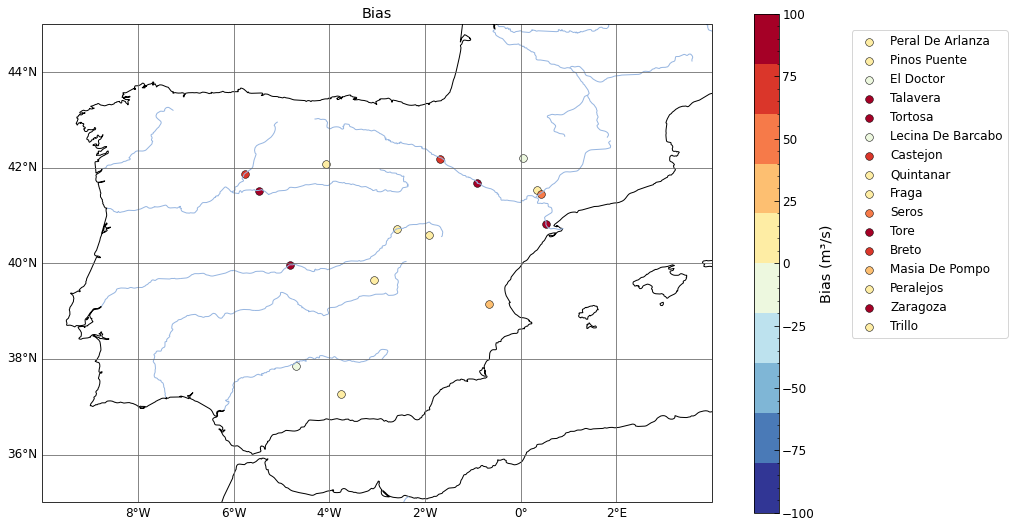

In [24]:
sim=sim224
metric_to_use = metric_bias
display_metric_map(sim, obs, stations_dict_filtered, metric_to_use, metric_min=-100, metric_max=100, legend=True)

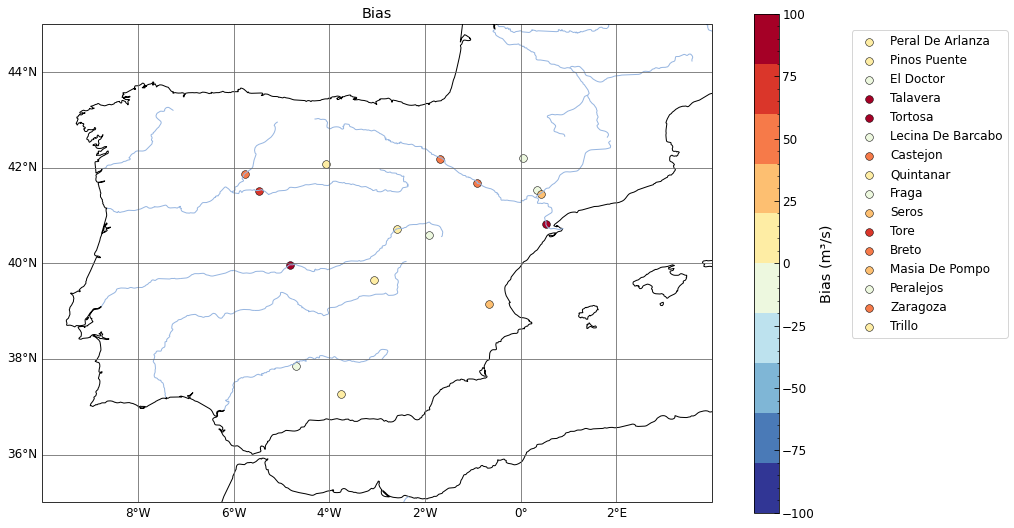

In [25]:
sim=sim225
metric_to_use = metric_bias
display_metric_map(sim, obs, stations_dict_filtered, metric_to_use, metric_min=-100, metric_max=100, legend=True)

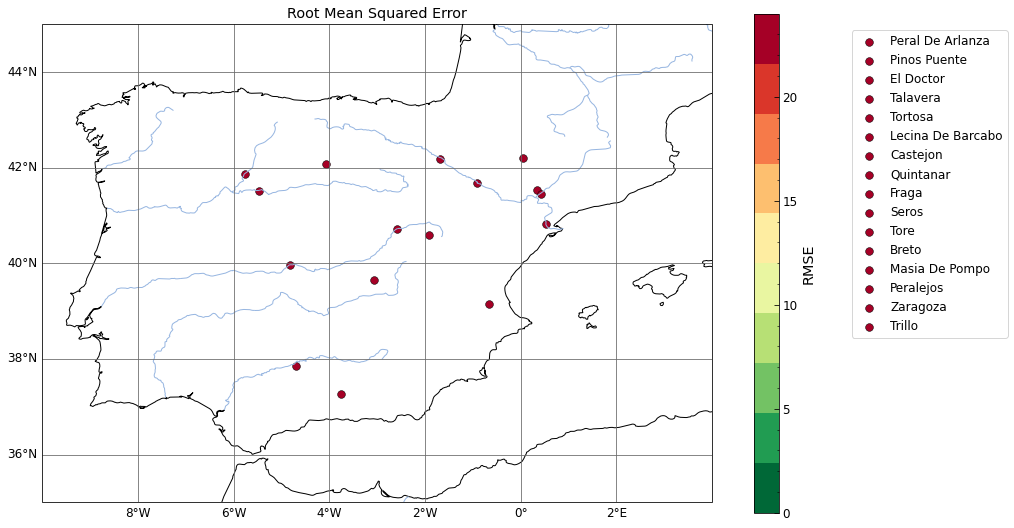

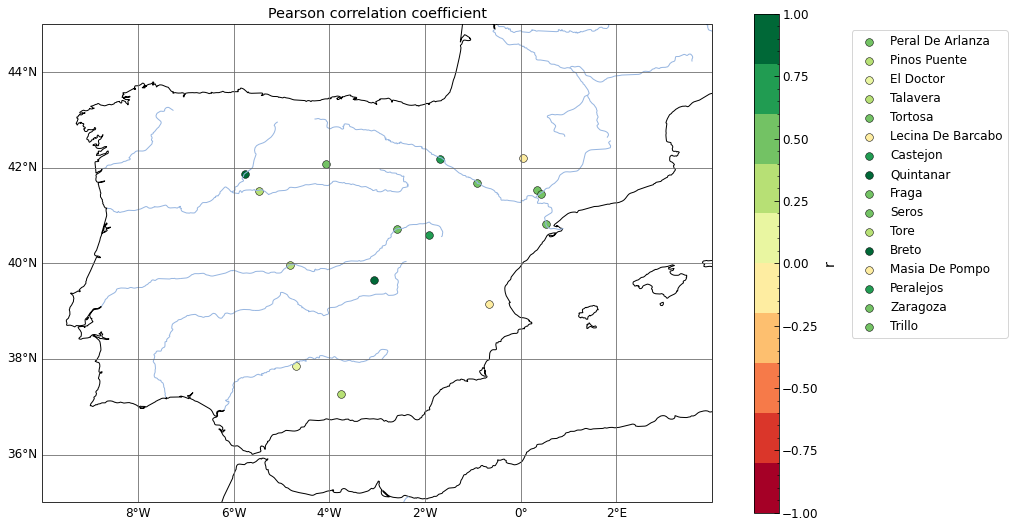

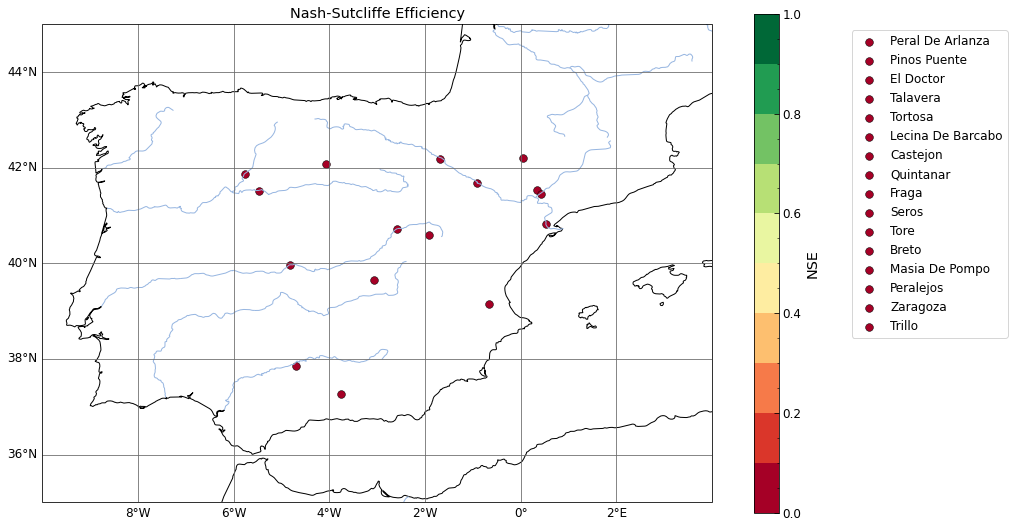

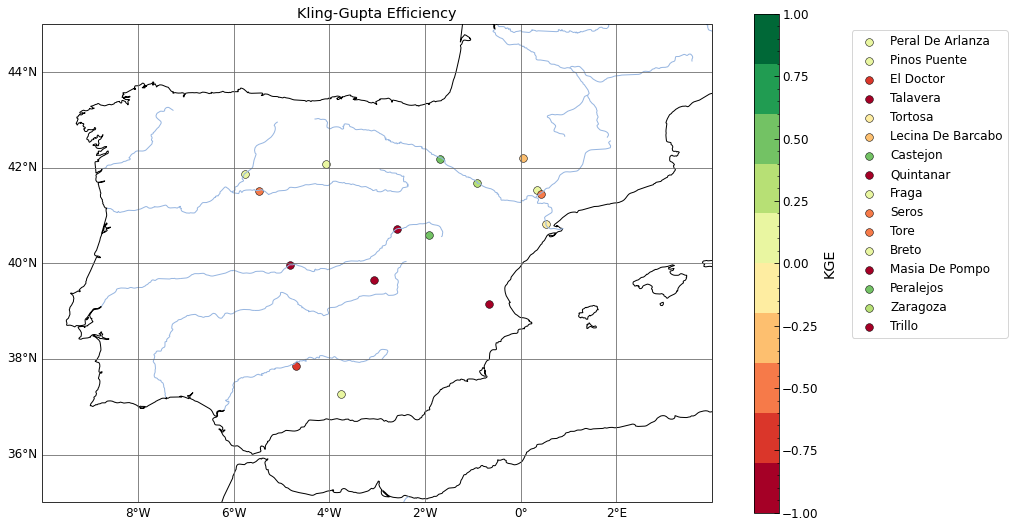

In [26]:
sim=sim224
metric_list=[metric_rmse, metric_tcorr, metric_nse, metric_kge]
for metric_to_use in metric_list:
    display_metric_map(sim, obs, stations_dict_filtered, metric_to_use, legend=True)

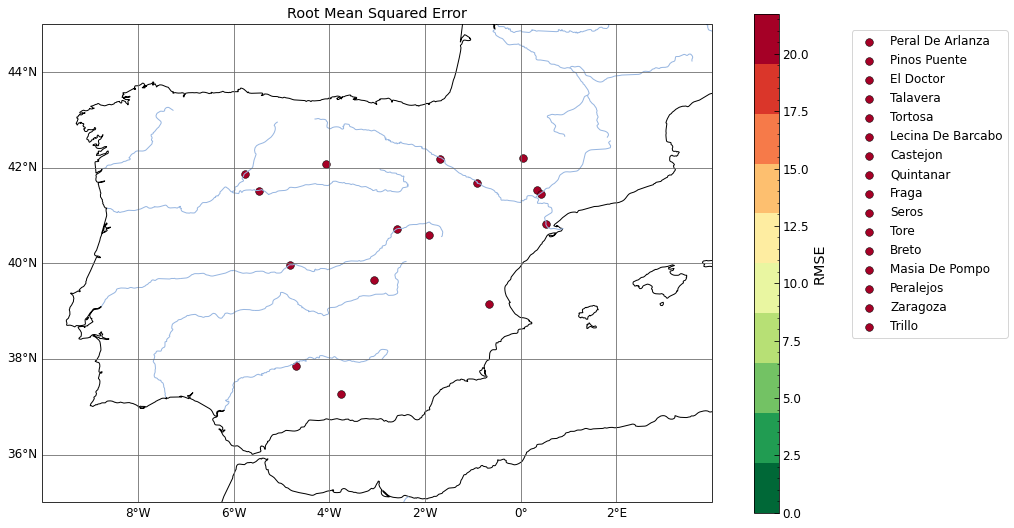

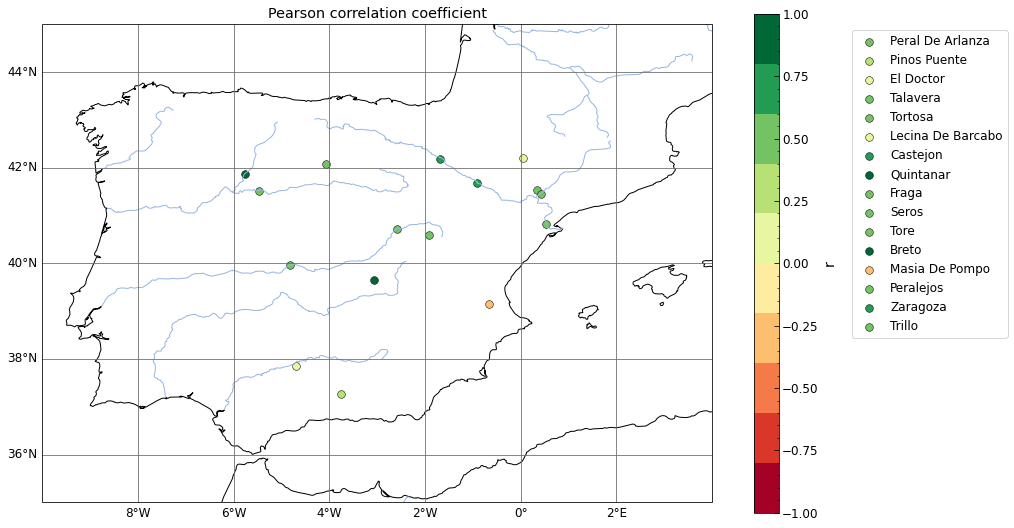

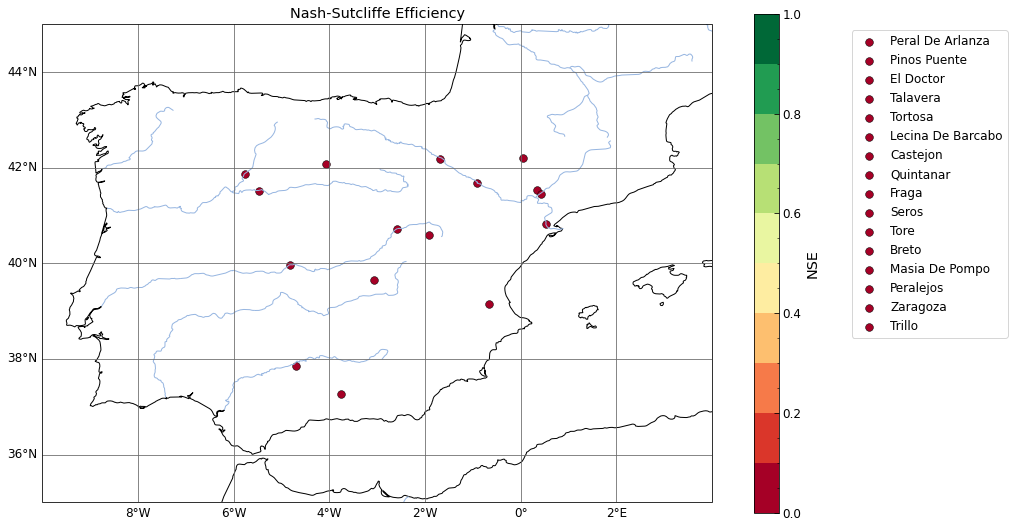

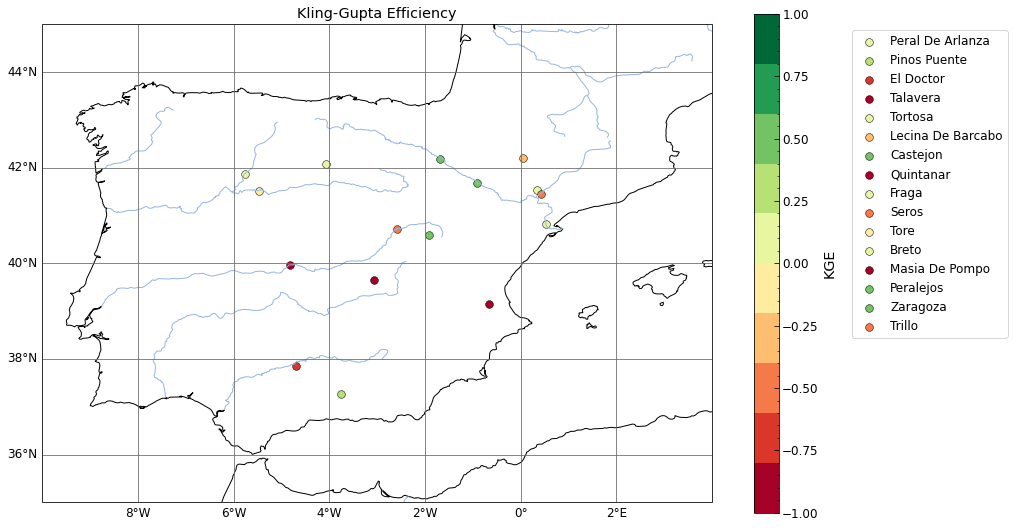

In [27]:
sim=sim225
metric_list=[metric_rmse, metric_tcorr, metric_nse, metric_kge]
for metric_to_use in metric_list:
    display_metric_map(sim, obs, stations_dict_filtered, metric_to_use, legend=True)